# What Is Containerization?
Installation problems are very common when a project is deployed on a different. Meaning, when a project is developed on a environment and deployed on another environment, there could be some problem that could be encountered, like, conflicts in the versions of dependencies, unavailability of certain dependencies that the project requires, difference in hardware, etc.

Consider the following pipeline used in Data Science,
1. Data collection.
2. Data cleaning, EDA, and feature engineering.
3. Model building and evaluation.
4. Deploying the model. This involves the following steps,
    - Package the model and create an API.
    - Delpoying on some server.

Containerization comes into the picture in step 4. Containerization or a container service helps in packaging the software (ML model in this case) into a portable item.

Before container services came into existence, the developer apart from developing a software, also used to compose a file containing the BKM (Best Known Method) to get the software up and running. This BKM contained all the information about the requirements (Hardware + OS + Software) and the installation steps. Repeating this process over and over again is obviously tedious. Also, even if a single step is missed or in-correctly executed, solving the reprecussions would take a lot of time.

Container services solved exactly this problem, where all the dependencies are packaged into a single sub system (a container) and this is shipped for deployment. The different dependencies that a container has are,
- An OS of its own with a file system and network with its own ports.
- Project dependencies.

A container is essential a computer machine like any other with restrictions on certain things like RAM, Storage, Processor etc. Containers are lightweight, portable units that package an application and its dependencies together, ensuring that it runs consistently across different environments. In a nutshell, a container is a machine that is built for a single project.

# Comparison Of Containers And Virtual Machines
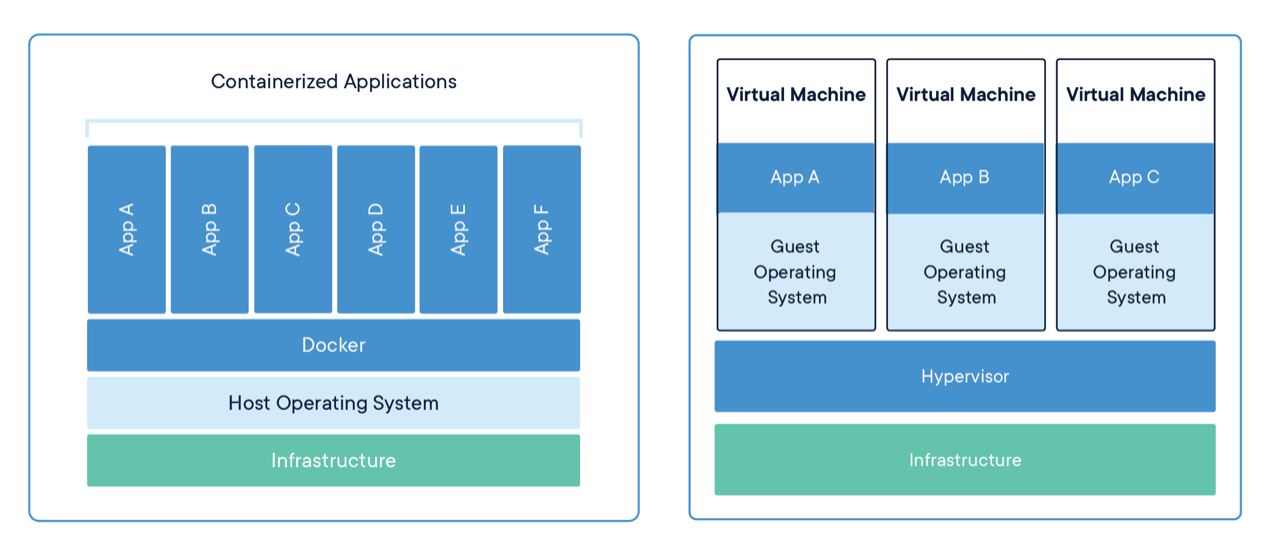

### Containers
Containers are lightweight, portable units that package an application and its dependencies together. They provide a consistent environment for the application to run, regardless of the underlying operating system. Containers are often created using tools like Docker and share the host operating system's kernel, making them more efficient than virtual machines.

Multiple containers can run on the same machine and share the OS kernel with other containers, each running an isolated processes in user space. Containers take up less space than VMs, can handle more applications and require fewer VMs and Operating Systems.

### Vritual Machines
Virtual machines (VMs) are emulated computer systems that run on a host operating system. They provide a complete isolated environment, including their own operating system, hardware resources, and network configuration. VMs are often used for testing, development, or running multiple operating systems on a single physical machine. They are generally heavier and require more resources than containers.

# What Is Docker?
Docker is a container services platform that simplifies the process of creating, deploying, and running applications using containers. A Docker container image is a lightweight, standalone, executable package of software that includes everything needed to run an application: code, runtime, system tools, system libraries and settings.

The way Docker works is,
- The Hardware of the machine forms the first layer. Hardware is made up of RAM, CPU and storage.
- The Host OS forms the second layer.
- Docker Engine forms the third layer.
- Containers form the fourth layer.

Docker Engine is the core component of the Docker platform. It is responsible for managing containers, images and networks. Think of it as the runtime environment that executes the Docker Containers. Key function functions of Docker Engine include,
- Container Management: Creates, starts, stops, and deletes containers.
- Image Management: Builds, pulls, and pushers Docker images.
- Network Managements: Creates and manages networks for containers to communicate with each other and external services.
- Volume Management: Manages data volumes that persist outside of containers.

Regardless of what operating system that is running on the host, the containers can always run on a different one altogether. This is made possible by the Docker Engine.

# Docker Architecture
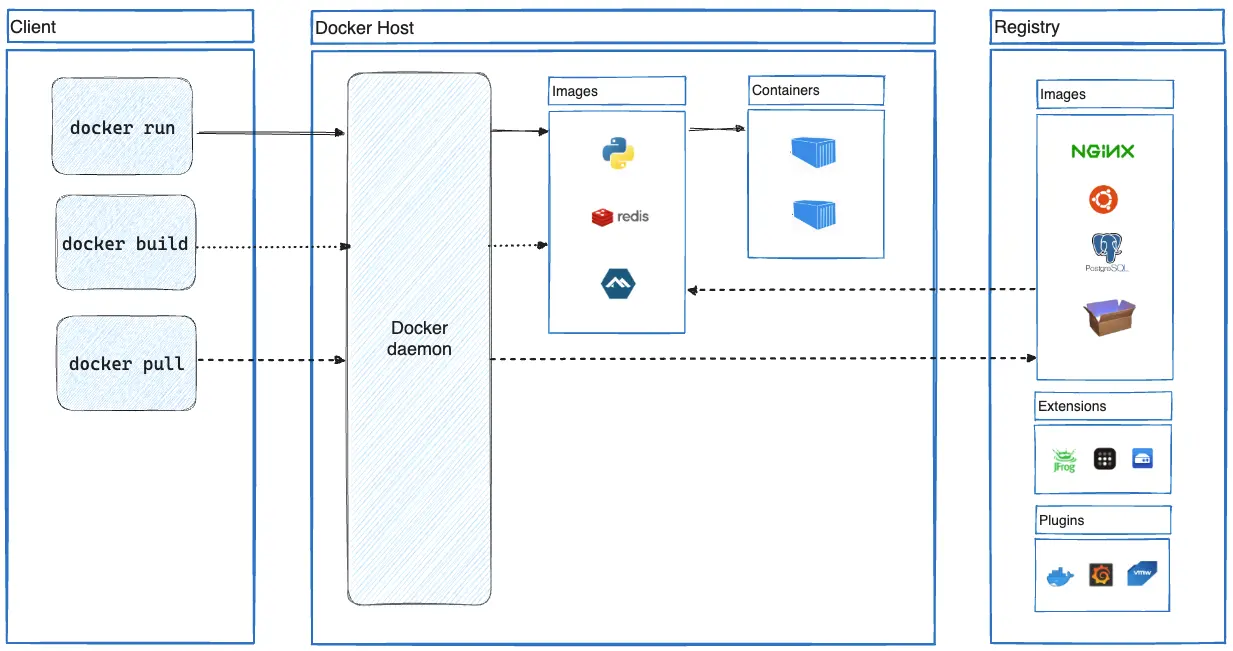

Docker uses a client-server architecture. The Docker client talks to the Docker daemon, which does the heavy lifting of building, running, and distributing the Docker containers. The Docker client and daemon can run on the same system, or a Docker client can be connected to a remote Docker daemon. The Docker client and daemon communicate using a REST API, over UNIX sockets or a network interface. Another Docker client is Docker Compose, that lets you work with applications consisting of a set of containers.

### The Docker daemon
The Docker daemon (`dockerd`) listens for Docker API requests and manages Docker objects such as images, containers, networks, and volumes. A daemon can also communicate with other daemons to manage Docker services.

### The Docker client
The Docker client (`docker`) is the primary way that many Docker users interact with Docker. When commands such as `docker run` is used, the client sends these commands to `dockerd`, which carries them out. The `docker` command uses the Docker API. The Docker client can communicate with more than one daemon.

### Docker desktop
Docker Desktop is an easy-to-install application for Mac, Windows or Linux environment that enables in building and sharing containerized applications and microservices. Docker Desktop includes the Docker daemon (`dockerd`), the Docker client (`docker`), Docker Compose, Docker Content Trust, Kubernetes, and Credential Helper.

### Docker registry
A Docker registry stores Docker images. Docker Hub is a public registry that anyone can use, and Docker looks for images on Docker Hub by default.

When commands like `docker pull` or `docker run` are used, Docker pulls the required images from your configured registry. When the `docker push` command is used, Docker pushes the images to the configured registry.

### Docker objects
When Docker is used, images, containers, networks, volumes, plugins and other objects are being created.

##### Images
An image is a read-only template with instructions for creating a Docker container. Often, an image is based on another image, with some additional customization. For example, an image may be built which is based on the ubuntu image, but installs the Apache web server and the developer's application, as well as the configuration details needed to make the application run.

An image can be created, or an image created by others and published in a registry may be used. To build an image, a Dockerfile is created with a simple syntax for defining the steps needed to create the image and run it. Each instruction is a Dockerfile creates a layer in the image. When the Dockerfile is changed and the image is rebuilt, only those layers which have been changed are rebuilt. This is part of what makes images so lightweight, small,a nd fast when compared to other virtualization technologies.

##### Containers
A container is a runnable instance of an image. Docker API or CLI can be used to start, stop, move, or delete a container. A container can be connected to one or more networks, storage can be attached to it, or even new images can be created based on its current state.

By default, a container is relatively well isolated from other containers and its host machine. Control can be levied on how isolated a container's network, storage, other underlying subsystems are from other containers or from the host machine.

A container is defined by its image as well as any configuration options that are provided to it when created or started. When a container is removed, any changes to its state that aren't stored in persistent storage disappear.

##### Example `docker run` command
The following command runs an `ubuntu` container, attaches interactively to the local command-line session, and runs `/bin/bash`.

When this command is run, the following happens,
1. If the `ubuntu` image is not present locally, Docker pulls it from the configured registry, as though the command `docker pull ubuntu` were manually.
2. Docker creates a new container, as though the command `docker container create` were manually.
3. Docker allocates a read-write file system to the container, as its final layer. This allows a running container to create or modify files and directories in its local filesystem.
4. Docker creates a network interface to connect the container to the default network, since any networking options were not specified. This includes assigning an IP address to the container. By default, containers can connect to external networks using the host machine's network connection.
5. Docker starts the container and executes `/bin/bash`. Because the container is running interactively and attached to the terminal (due to the `-i` and `-t` flags), input can be provided using your keyboard while Docker logs the output to the terminal.
6. When `exit` is run to terminate the `/bin/bash` command, the container stops but is not removed. It can be started again, or it can be removed.

# Docker Hub
Docker Hub is a service provided by Docker for finding and sharing container images.

It's the world’s largest repository of container images with an array of content sources including container community developers, open source projects, and independent software vendors (ISV) building and distributing their code in containers.

Consider that a NodeJS application has to be built. In order to do so, an OS is needed, on top of this all the other dependencies are installed. Now which of the following 2 scenarios is preferred?
1. Download a Docker image which only has a Linux based OS installed, and NodeJS has to be installed on top of that.
2. Download a Docker image which has both Linus based OS and NodeJS already installed.

Obviously, scenario 2 is preferred.

Every Docker image starts from a base image, usually a linux base image. The base images can be found on Docker Hub. Follow this link: https://hub.docker.com/explore.

Follow these steps,
1. Download and install https://www.docker.com/products/docker-desktop/.
2. Login or create an account.
3. Goto Docker Hub > Explore, https://hub.docker.com/explore.
4. Search for "Pyhton" in the search box.
5. Official images are indicated with a green ribbon tag, and a prompt "Docker Official Image" is displayed when hovered over.
6. Click on the Official image of Python, and once the following page is opened, under the "Overview" section there are multiple versions of Python images listed. Clicking on any one of them will open a Dockerfile in a GitHub repo which shows how the image is built.
7. Go back to the Docker Hub tab and select "Tags", and search for "3.9-slim-buster" in the "Filer Tags" box.